# HR Analytics

# Defining the Problem

The purpose of this project is to understand the factors that cause employees to leave their jobs.  Understanding this question is critical because companies spend significant amounts of time and money hiring new employees and training them to the needed level. 

In [1]:
# Author Details
__author__ = "John Samson"
__email__ = "samson.john@gmail.com"

# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Data Discovery

### Loading the data

In [2]:
df = pd.read_csv('HR-data.csv.txt', delimiter = ',')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


### Examing and Cleaning the Data

In [3]:
# Checking null values
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [4]:
#Renaming columns
df = df.rename(columns = {'satisfaction_level' : 'satisfaction',
           'last_evaluation' : 'evaluation',
           'number_project' : 'project_count',
           'time_spend_company' : 'years_at_company',
           'Work_accident' : 'work_accident',
           'left' : 'turnover',
           'promotion_last_5years' : 'promotion',
           'sales' : 'department',
           'average_montly_hours' : 'average_monthly_hours'})

df.head()

,satisfaction,evaluation,project_count,average_monthly_hours,years_at_company,work_accident,turnover,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
# Separating dataframe based on column type
numeric_df = df.select_dtypes(include = [np.number])
cat_df = df.select_dtypes(include = ['O'])

In [6]:
# Statistics for numerical variables
df.describe(include = [np.number])

,satisfaction,evaluation,project_count,average_monthly_hours,years_at_company,work_accident,turnover,promotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
# Statistics for categorical variables
df.describe(include = ['O'])

,department,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


## Exploratory Data Analysis

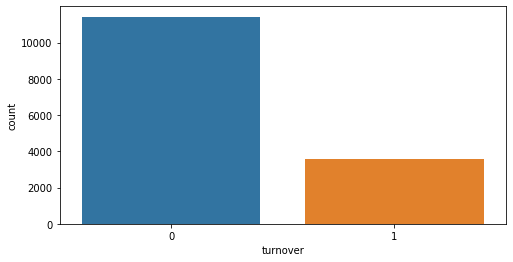

In [8]:
plt.figure(figsize = (8, 4))
sns.countplot(df['turnover'])
plt.show()

**Observation:**
There is a clear imbalance of employees who stayed (label 0) compared to those who left (label 1).  We will deal with the imbalance when we address model fitting.

In [9]:
turnover_summary = df.groupby('turnover').mean()
turnover_summary

,satisfaction,evaluation,project_count,average_monthly_hours,years_at_company,work_accident,promotion
turnover,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


**Observation:**
Comparing the groups of employee who stayed versus those who left, employees who left typically had lower levels of satisfaction, had fewer work accidents, and were less promoted. 

### Plotting Numerical Variables 

In [10]:
def histograms_plot(df, features, rows, cols):
    fig = plt.figure(figsize = (20,20))
    for i, feature in enumerate(features):
        ax = fig.add_subplot(rows, cols, i+1)
        df[feature].hist(bins = 20, ax = ax, facecolor = 'blue')
        ax.set_title(' {} DISTRIBUTION'.format(feature.upper().replace('_', ' ')), fontsize = 14)

    fig.tight_layout()  
    plt.show()

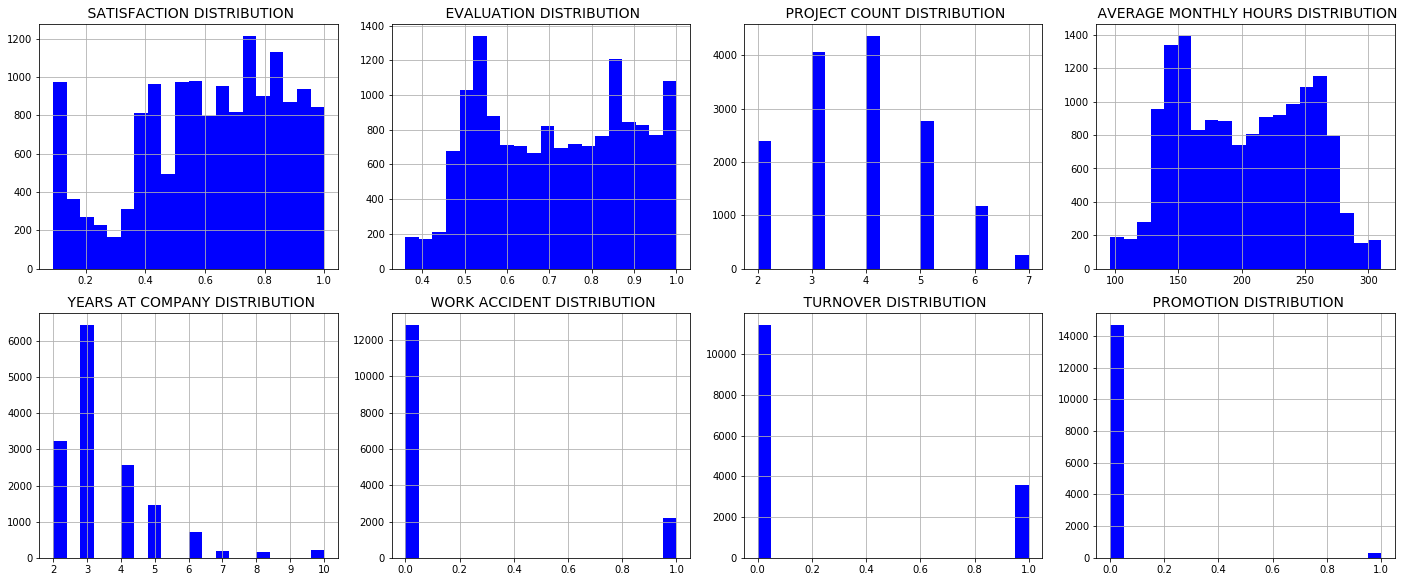

In [11]:
histograms_plot(numeric_df, numeric_df.columns, 5, 4)

**Observation:**

- In terms of satisfaction level, there is clearly a large group of employees who are not happy (satisfaction level < 0.2). 
- For evaluation level, there's a large number of employees who are not being evaluated as much as others.
- For average monthly hours, there are two peak groups.  One group averages 150 monthly hours and another group avearges 250 monthly hours.
- For the project count, project number tends to generally decrease after an employee takes on 4 projects.

We will compare these variables with respect to turnover and see if any trends are present. 

In [12]:
kde_var = ['satisfaction', 'evaluation', 'average_monthly_hours', 'project_count']

def kdeplot(df, features, dep_var, cond1, cond2, shade, label1, label2, rows, cols):
    fig = plt.figure(figsize = (20, 12))
    for i, feature in enumerate(features):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax = sns.kdeplot(df.loc[(df[dep_var] == cond1), feature], color = 'blue', shade = shade, label = label1)
        ax = sns.kdeplot(df.loc[(df[dep_var] == cond2), feature], color = 'green', shade = shade, label = label2)
        plt.title('{} KDE PLOT'.format(feature.upper().replace('_', ' ')), fontsize = 14)

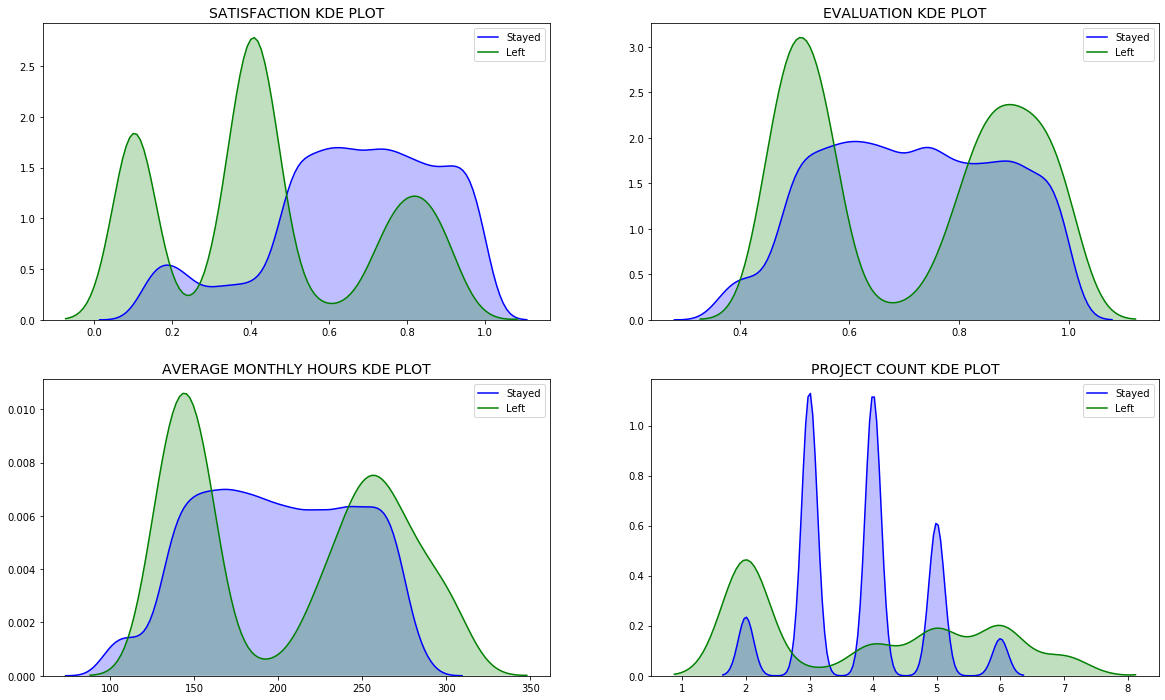

In [13]:
kdeplot(df, kde_var, 'turnover', 0, 1, True, 'Stayed', 'Left', 2, 2)

**Observations:**

- For the Satisfaction KDE, there are three clear peaks of satisfaction for employees who left (0.1, 0.4, 0.8 levels of satisfaction). 
- For the Evaluation KDE, there are two clear peaks for employees who left (evaluation levels of 0.5 and 0.9).
- For the Average Monthly Hours KDE, a good number of employees left who worked `150 hours or less` and those who worked `250 hours or more`.  Employees left either there **underworked** (not having work/projects to do) or **overworked** (stretched out to thin).  
- For the Project Count KDE, employees left when they had a lower project count compared a higher project count.  This illustrates that employees left because the company did not have work for them or they were not challenged at their position.

### Identifying Cluster Groups

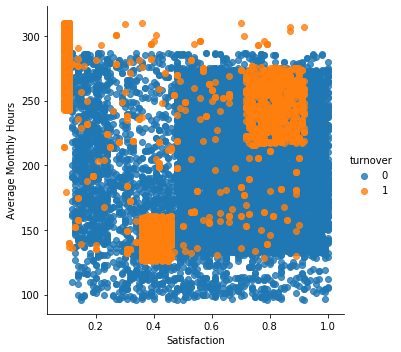

In [14]:
sns.lmplot(x = 'satisfaction', y = 'average_monthly_hours', data = df, fit_reg = False, hue = 'turnover')
plt.xlabel('Satisfaction')
plt.ylabel('Average Monthly Hours')
plt.show()

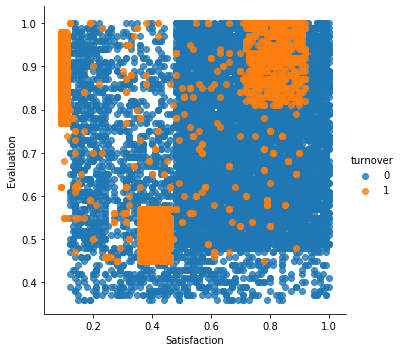

In [15]:
sns.lmplot(x = 'satisfaction', y = 'evaluation', data = df, fit_reg = False, hue = 'turnover')
plt.xlabel('Satisfaction')
plt.ylabel('Evaluation')
plt.show()

**Observation:**
From these plots, there are three distinct clusters:


**Cluster 1 (low satisfaction, high evaluation):**  For these employees, their satisfaction levels are around 0.1 but are evaluated very highly by management.  However, the same group of dissatisfied employees also work 250 monthly hours or more.  This shows that these employees are not happy because they are overworked and are not be recognized for their work.


**Cluster 2 (low-mid satisfaction, low evaluation):** These employees had satisfaction levels between 0.35 and 0.45 with evaluation levels between 0.45 and 0.55.  Additionally, these employees worked 150 hours per month or less.  These employees could have underformed from management standpoint since their evaluation scores were quite low.  Also, these employees had work volume on the low range.  They could have been part-time employees/contractors or full-time employees who were not given enough work to do.


**Cluster 3 (high satisfaction, high evaluation):** These employees had satisfaction levels between 0.70 and 0.90 along with evaluation levels greater than 0.8.  Additionally, these employees worked 250 hours per month or greater.  These employees could be classified as **'superstars'** of the company.  They could have left because they accomplished everything they could at their current position and left the company to pursue greater opportunities.  

### Employee Department Distribution

In [16]:
# Turnover counts for each department 
stay_df = df[df['turnover'] == 0]
left_df = df[df['turnover'] == 1]

stay_df = pd.DataFrame(stay_df['department'].value_counts()).reset_index()
left_df = pd.DataFrame(left_df['department'].value_counts()).reset_index()

turnover_df = pd.merge(left_df, stay_df, how = 'inner', on = 'index')
turnover_df.rename({'index' : 'department',
                   'department_x' : 'left_company',
                   'department_y' : 'with_company'}, axis = 1, inplace = True)

turnover_df['total_employees'] = turnover_df['left_company'] + turnover_df['with_company']
turnover_df['percent_turnover'] = round(100 * (turnover_df['left_company'] / turnover_df['total_employees']), 2)

turnover_df

,department,left_company,with_company,total_employees,percent_turnover
0,sales,1014,3126,4140,24.49
1,technical,697,2023,2720,25.62
2,support,555,1674,2229,24.90
3,IT,273,954,1227,22.25
4,hr,215,524,739,29.09
5,accounting,204,563,767,26.60
6,marketing,203,655,858,23.66
7,product_mng,198,704,902,21.95
8,RandD,121,666,787,15.37
9,management,91,539,630,14.44


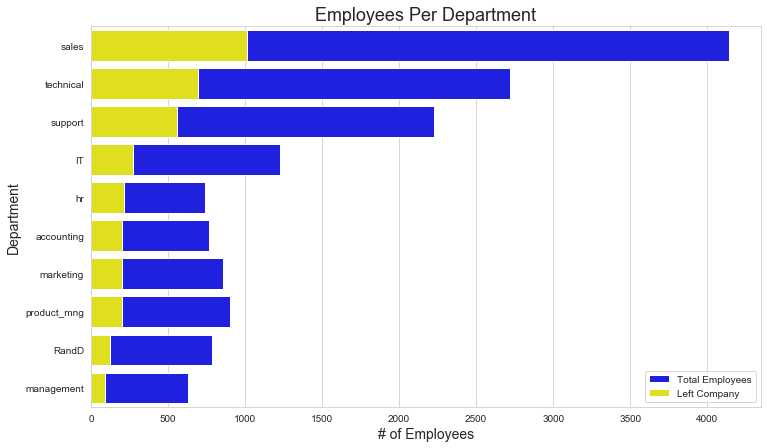

In [17]:
# Department Turnover Barplot
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize = (12, 7))
sns.barplot(x = 'total_employees', y = 'department', data = turnover_df, label = 'Total Employees', color = 'blue')
sns.barplot(x = 'left_company', y = 'department', data = turnover_df, label = 'Left Company', color = 'yellow')
plt.xlabel('# of Employees', fontsize = 14)
plt.ylabel('Department', fontsize = 14)
plt.title('Employees Per Department', fontsize = 18)
ax.legend(loc = "lower right", frameon = True)
plt.show()

**Observations:** Percent turnover is about the same for each deparment, except for RandD and management (which have slightly lower turnover).  Sales, Technical, and Support departments have the greatest number of employees in the company.  We will analyze turnover trends to see if they are consistent with our general observations. 

### Data Visualizations for Key Departments

In [18]:
#Defining dataframes
sales_df = df[df['department'] == 'sales']
technical_df = df[df['department'] == 'technical']
support_df = df[df['department'] == 'support']

### 1) Sales Department

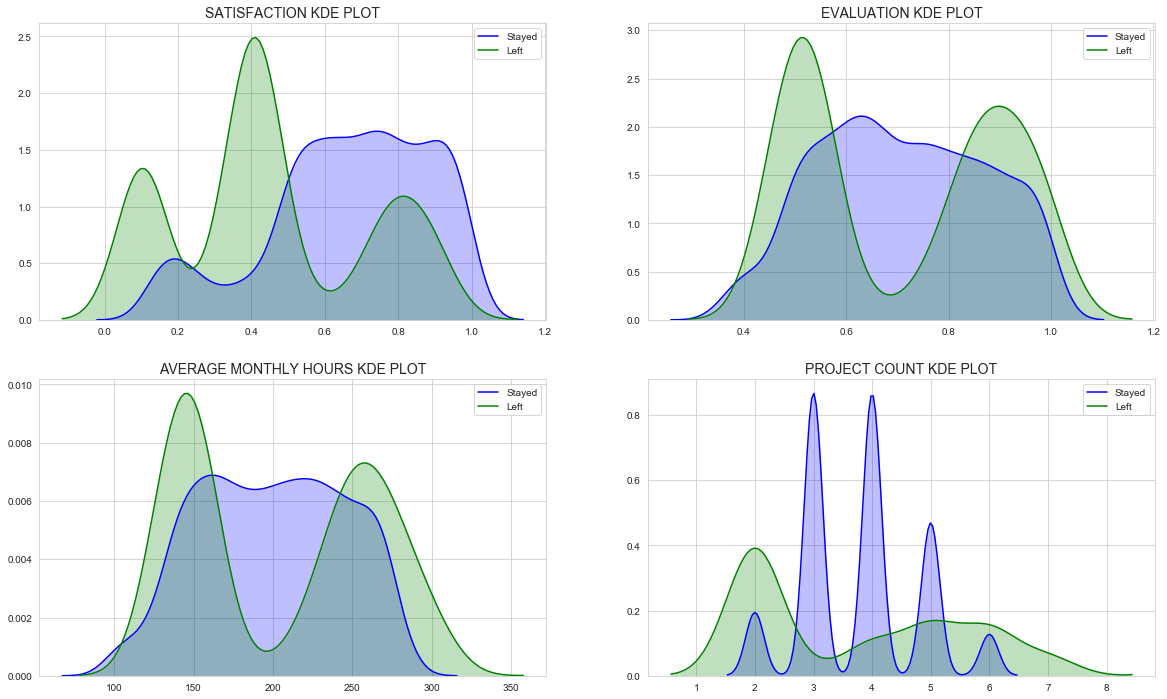

In [19]:
kdeplot(sales_df, kde_var, 'turnover', 0, 1, True, 'Stayed', 'Left', 2, 2)

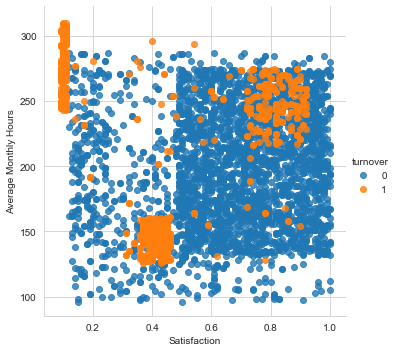

In [20]:
sns.lmplot(x = 'satisfaction', y = 'average_monthly_hours', data = sales_df, fit_reg = False,
           hue = 'turnover')
plt.xlabel('Satisfaction')
plt.ylabel('Average Monthly Hours')
plt.show()

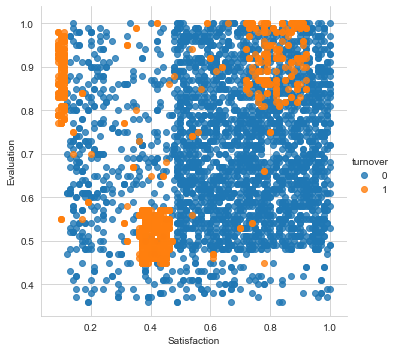

In [21]:
sns.lmplot(x = 'satisfaction', y = 'evaluation', data = sales_df, fit_reg = False,
           hue = 'turnover')
plt.xlabel('Satisfaction')
plt.ylabel('Evaluation')
plt.show()

### 2) Technical Department

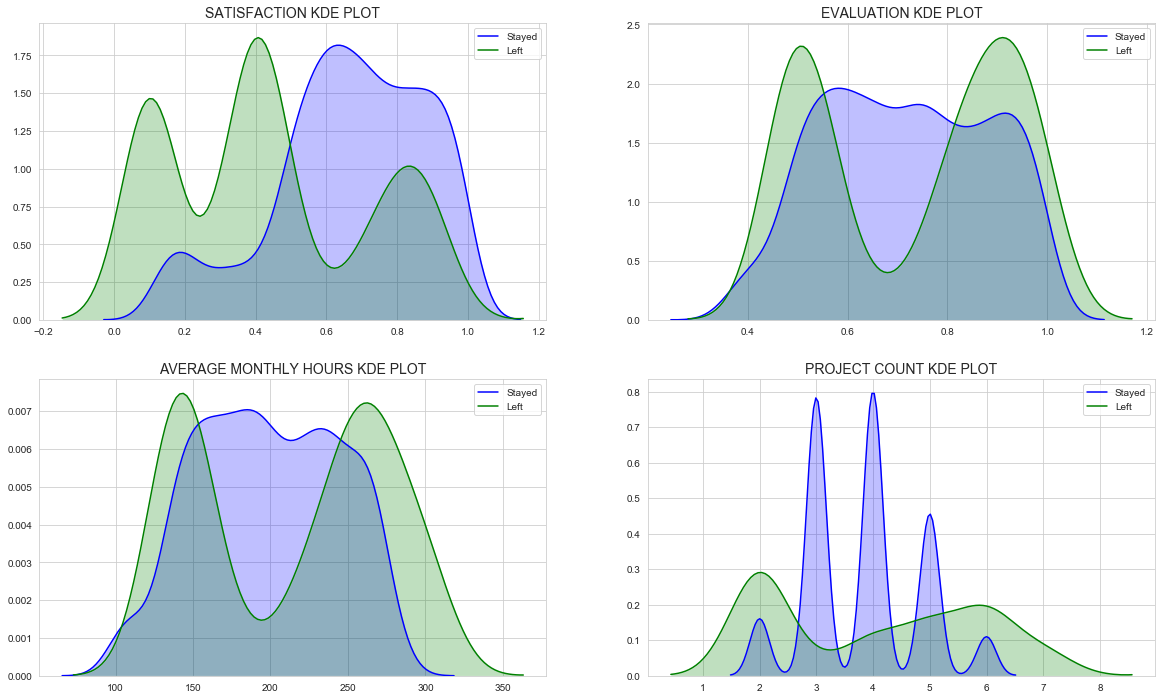

In [22]:
kdeplot(technical_df, kde_var, 'turnover', 0, 1, True, 'Stayed', 'Left', 2, 2)

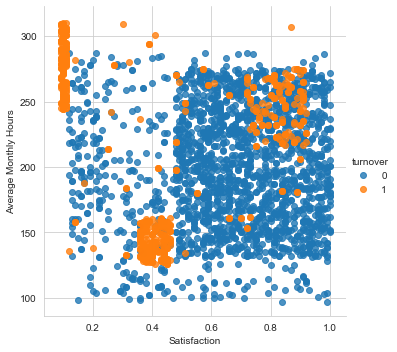

In [23]:
sns.lmplot(x = 'satisfaction', y = 'average_monthly_hours', data = technical_df, fit_reg = False,
           hue = 'turnover')
plt.xlabel('Satisfaction')
plt.ylabel('Average Monthly Hours')
plt.show()

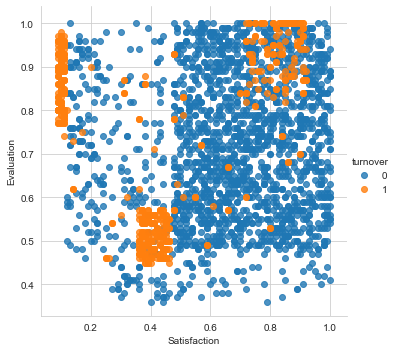

In [24]:
sns.lmplot(x = 'satisfaction', y = 'evaluation', data = technical_df, fit_reg = False,
           hue = 'turnover')
plt.xlabel('Satisfaction')
plt.ylabel('Evaluation')
plt.show()

### 3) Support Department

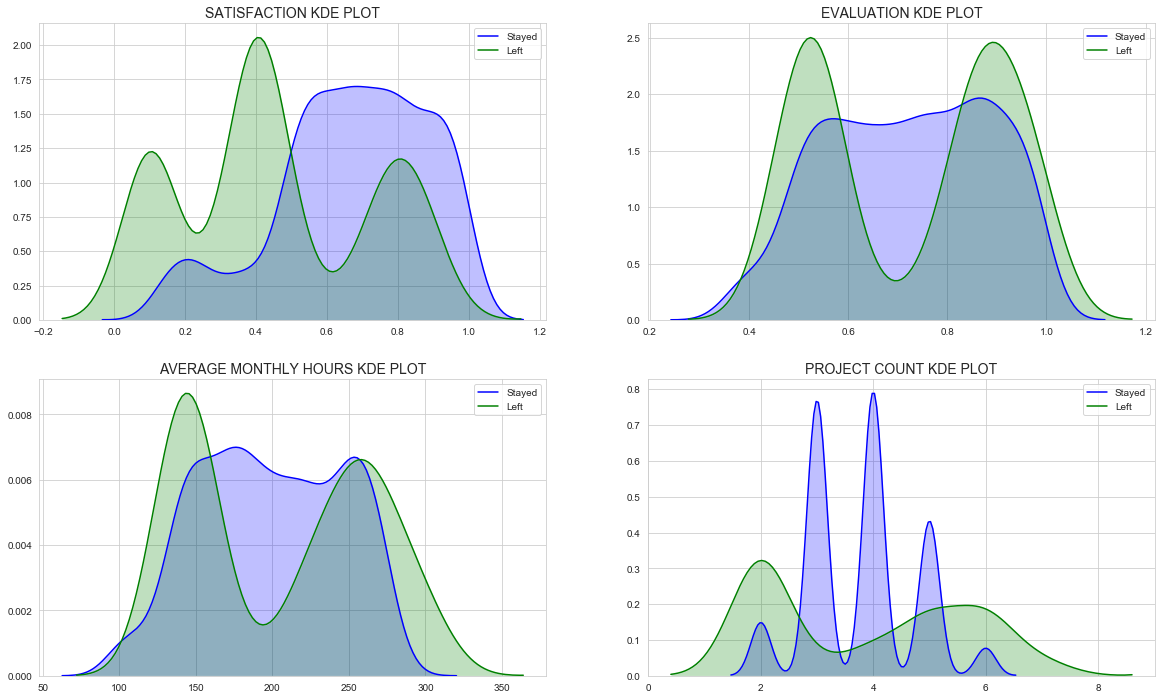

In [25]:
kdeplot(support_df, kde_var, 'turnover', 0, 1, True, 'Stayed', 'Left', 2, 2)

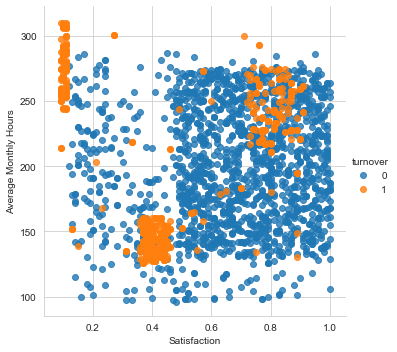

In [26]:
sns.lmplot(x = 'satisfaction', y = 'average_monthly_hours', data = support_df, fit_reg = False,
           hue = 'turnover')
plt.xlabel('Satisfaction')
plt.ylabel('Average Monthly Hours')
plt.show()

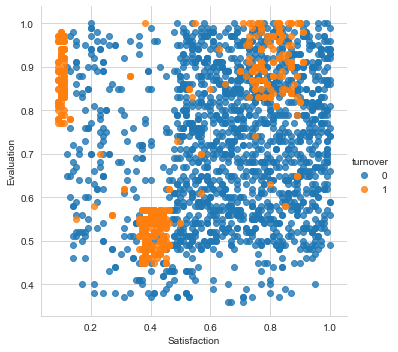

In [27]:
sns.lmplot(x = 'satisfaction', y = 'evaluation', data = support_df, fit_reg = False,
           hue = 'turnover')
plt.xlabel('Satisfaction')
plt.ylabel('Evaluation')
plt.show()

**Observations:** For each department, the KDE and scatter show similar trends to the inital visualizations.  This shows that the largest departments have turnover trends representative of the entire dataset.  

### Correlation Matrix

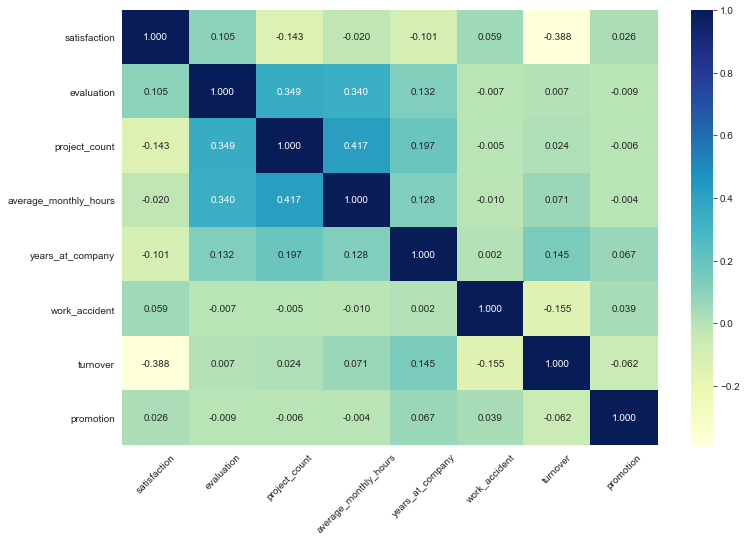

In [28]:
fig = plt.figure(figsize = (12, 8))
sns.heatmap(numeric_df.corr(), cmap = 'YlGnBu', annot = True, fmt = '0.3f')
plt.xticks(rotation = 45)
plt.show()

**Observation:** There is a significant relationship between turnover and satisfaction.  Typically, turnover occurs when employees are less satisfied.  There is also a relationship between project count, average monthly hours, and years at the company.  

### Data Preprocessing and Splitting Train/Test Set

In [29]:
# Creating dataframe for model selection using one-hot encoding for categorical variables
one_hot_cat_df = pd.get_dummies(cat_df)
model_df = pd.concat([numeric_df, one_hot_cat_df], axis = 1)
model_df.head()

,satisfaction,evaluation,project_count,average_monthly_hours,years_at_company,work_accident,turnover,promotion,department_IT,department_RandD,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [30]:
# Creating our test/train split dataset
from sklearn.model_selection import train_test_split, KFold

features = model_df.drop('turnover', axis = 1)
target = model_df['turnover']

#Define train/test dataset
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state = 8, shuffle = True)

In [31]:
x_train

,satisfaction,evaluation,project_count,average_monthly_hours,years_at_company,work_accident,promotion,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
6544,0.79,0.36,3,114,3,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
2135,0.64,0.77,3,213,3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
857,0.11,0.78,6,303,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
5609,0.86,0.77,5,237,3,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1742,0.10,0.89,6,259,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2181,0.99,0.81,5,180,3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
10601,0.85,0.99,3,208,2,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2033,0.75,0.56,5,175,4,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
9556,0.97,0.88,4,237,4,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [32]:
y_train.value_counts()

0    9158
1    2841
Name: turnover, dtype: int64

### Dealing with Class Imbalance

In [33]:
df['turnover'].value_counts(normalize = True)

0    0.761917
1    0.238083
Name: turnover, dtype: float64

Since we have an imbalance in sampling with our target variable, we can create a more balanced sample using the following methods:

1. Upsampling the minority class
2. Upsampling using SMOTE (Synthetic Minority Over-Sampling Technique)
3. Downsample the majority class

In [34]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

# Upsampling the minority class
x_train_up, y_train_up = resample(x_train[y_train == 1], y_train[y_train == 1], replace = True,
                                  n_samples = x_train[y_train == 0].shape[0], random_state = 8)

x_train_up = pd.concat([x_train[y_train == 0], x_train_up])
y_train_up = pd.concat([y_train[y_train == 0], y_train_up])


# Upsampling with SMOTE
smote = SMOTE(random_state = 8)
x_train_smote, y_train_smote = smote.fit_sample(x_train, y_train)

# Downsampling the majority class
x_train_down, y_train_down = resample(x_train[y_train == 0], y_train[y_train == 0], replace = True, 
                                      n_samples = x_train[y_train == 1].shape[0], random_state = 8)

x_train_down  = pd.concat([x_train[y_train == 1], x_train_down])
y_train_down = pd.concat([y_train[y_train == 1], y_train_down])

In [35]:
# checking balance/imbalance of target variable for each sample
for sample in [y_train_up, y_train_smote, y_train_down]:
    print(sample.value_counts())

1    9158
0    9158
Name: turnover, dtype: int64
1    9158
0    9158
Name: turnover, dtype: int64
1    2841
0    2841
Name: turnover, dtype: int64


### Choosing the Sampling Technique for Modeling

To select which sampling technique to use, we will train a Logistic Regression model and evaluate the F1 score for each.  The results below show that the **SMOTE** sample has the best F1.  We will use this sample to train our models.

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve

sampling_methods = {}
sampling_methods['original_sample'] = (x_train, y_train)
sampling_methods['upsample'] = (x_train_up, y_train_up)
sampling_methods['smote'] = (x_train_smote, y_train_smote)
sampling_methods['downsample'] = (x_train_down, y_train_down)

# Applying 10-fold cross validation for each sampling set and applying to a Logistic Regression model
for sample in sampling_methods.keys():
    logistic_reg_results = cross_val_score(LogisticRegression(max_iter = 1000), sampling_methods[sample][0], 
                                           sampling_methods[sample][1], cv = 10, scoring = 'f1')
    print('F1 score for {}:'.format(sample))
    print(round(logistic_reg_results.mean(), 4))

F1 score for original_sample:
0.4451
F1 score for upsample:
0.7843
F1 score for smote:
0.8103
F1 score for downsample:
0.7799


### Evaluating Three Models with Cross-Validation

In [43]:
models = []
models.append(('Logistic Regression', LogisticRegression(max_iter = 1000, class_weight = 'balanced')))
models.append(('Random Forest Classifier', RandomForestClassifier(n_estimators = 100, max_depth = 5, n_jobs = -1, 
                                                                  verbose = 0, random_state = 8)))
models.append(('Graident Boosting Classifier', GradientBoostingClassifier(n_estimators = 100, max_depth = 5, 
                                                                         verbose = 0, random_state = 8)))

# Initiating a dataframe to store results
models_dataframe = pd.DataFrame(columns = ['Model', 'AUC ROC Mean', 'Accuracy Mean'])

# Initating counter for loop
i = 0

for name, model in models:
    k_fold = KFold(n_splits = 10, random_state = 8, shuffle = True)
    cross_val_accuracy = cross_val_score(model, x_train, y_train, cv = k_fold, scoring = 'accuracy')
    cross_val_auc = cross_val_score(model, x_train, y_train, cv = k_fold, scoring = 'roc_auc')
    models_dataframe.loc[i] = [name,
                               round(cross_val_accuracy.mean(), 4),
                               round(cross_val_auc.mean(), 4)]
    i += 1

models_dataframe

,Model,AUC ROC Mean,Accuracy Mean
0,Logistic Regression,0.7651,0.8307
1,Random Forest Classifier,0.9217,0.9801
2,Graident Boosting Classifier,0.9817,0.9925


**Observations:**
From our analysis, it looks like Gradient Boosting and Random Forest have the greatest accuracy and AUC/ROC values from our three selected models.  We will train each model and see if similar results occurs,

## Training Models

We will use the following models for training purposes:

1. Logistic Regression
2. Random Forest
3. Gradient Boosting

### Logistic Regression (AUC = 0.744)

In [51]:
lr_model = LogisticRegression(max_iter = 1000)
lr_model.fit(x_train_smote, y_train_smote)
lr_roc_auc = roc_auc_score(y_test, lr_model.predict(x_test))

print('\n ---Logistic Regression---')
print('AUC Score = ', round(lr_auc, 4))
print('\n', classification_report(y_test, lr_model.predict(x_test)))


 ---Logistic Regression---
AUC Score =  0.744

               precision    recall  f1-score   support

           0       0.89      0.78      0.83      2270
           1       0.51      0.71      0.59       730

    accuracy                           0.76      3000
   macro avg       0.70      0.74      0.71      3000
weighted avg       0.80      0.76      0.77      3000



### Random Forest Classifier (AUC = 0.9511)

In [52]:
rf_model = RandomForestClassifier(n_estimators = 100, max_depth = 5, n_jobs = -1, verbose = 0, random_state = 8)
rf_model.fit(x_train_smote, y_train_smote)
rf_roc_auc = roc_auc_score(y_test, rf_model.predict(x_test))

print('\n ---Random Forest---')
print('AUC Score = ', round(rf_auc, 4))
print('\n', classification_report(y_test, rf_model.predict(x_test)))


 ---Random Forest---
AUC Score =  0.9511

               precision    recall  f1-score   support

           0       0.98      0.98      0.98      2270
           1       0.93      0.92      0.93       730

    accuracy                           0.97      3000
   macro avg       0.95      0.95      0.95      3000
weighted avg       0.97      0.97      0.97      3000



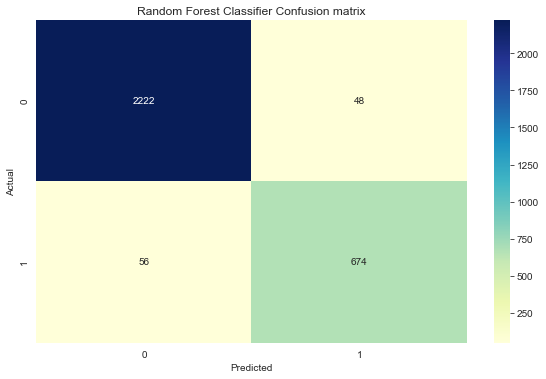

Test Set Accuracy = 96.53 %


In [40]:
## Random Forest Classifier Confusion Matrix
confusion_matrix_rf = confusion_matrix(y_test, rf_model.predict(x_test))

## Creating Heatmap
plt.figure(figsize = (8, 5))
sns.heatmap(pd.DataFrame(confusion_matrix_rf), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Random Forest Classifier Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print('Test Set Accuracy =', round(rf_model.score(x_test, y_test)*100, 2), '%')

### Gradient Boosting Classifier (AUC = 0.968)

In [53]:
gbc_model = GradientBoostingClassifier(n_estimators = 100, max_depth = 5, verbose = 0, random_state = 8)
gbc_model.fit(x_train_smote, y_train_smote)
gbc_roc_auc = roc_auc_score(y_test, gbc_model.predict(x_test))

print('\n ----------Gradient Boosting Classifier----------')
print('AUC Score = ', round(gbc_auc, 4))
print('\n', classification_report(y_test, gbc_model.predict(x_test)))


 ----------Gradient Boosting Classifier----------
AUC Score =  0.968

               precision    recall  f1-score   support

           0       0.98      0.99      0.99      2270
           1       0.96      0.95      0.96       730

    accuracy                           0.98      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.98      0.98      0.98      3000



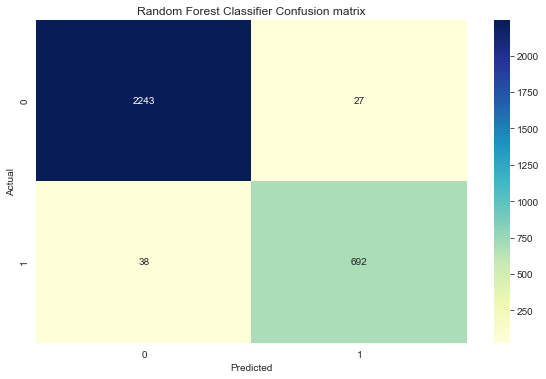

Test Set Accuracy = 97.83 %


In [42]:
## Gradient Boosting Classifier Confusion Matrix
confusion_matrix_gbc = confusion_matrix(y_test, gbc_model.predict(x_test))

## Creating Heatmap
plt.figure(figsize = (8, 5))
sns.heatmap(pd.DataFrame(confusion_matrix_gbc), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Random Forest Classifier Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print('Test Set Accuracy =', round(gbc_model.score(x_test, y_test)*100, 2), '%')

**Observation:**
From our models, it looks like Gradient Boosting Classifier works best with our data.  The confusion matrix tells us that out of the 3,000 entires in our test set, this model make 2,935 correct predictions.

### ROC Graph

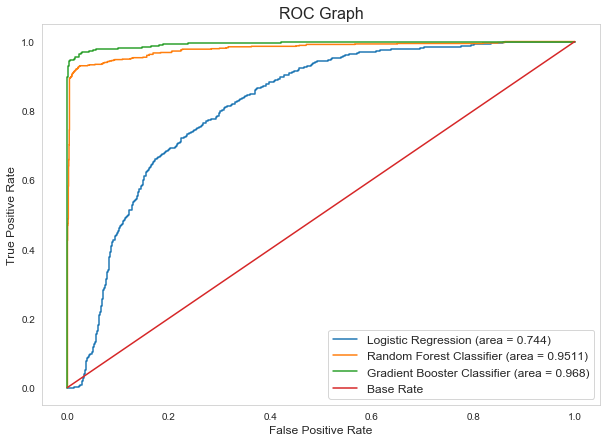

In [79]:
# Defining ROC Graph Points
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, lr_model.predict_proba(x_test)[:, 1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_model.predict_proba(x_test)[:, 1])
gbc_fpr, gbc_tpr, gbc_thresholds = roc_curve(y_test, gbc_model.predict_proba(x_test)[:, 1])
plt.figure(figsize = (10, 7))

# Plotting ROC curves for each model
plt.plot(lr_fpr, lr_tpr, Label = 'Logistic Regression (area = {})'.format(round(lr_roc_auc, 4)))
plt.plot(rf_fpr, rf_tpr, Label = 'Random Forest Classifier (area = {})'.format(round(rf_roc_auc, 4)))
plt.plot(gbc_fpr, gbc_tpr, Label = 'Gradient Booster Classifier (area = {})'.format(round(gbc_roc_auc, 4)))
plt.plot([0, 1], [0, 1], label = 'Base Rate')

# Changing plot features
plt.xlabel('False Positive Rate', fontsize = 12)
plt.ylabel('True Positive Rate', fontsize = 12)
plt.title('ROC Graph', fontsize = 16)
plt.grid(b = None)
plt.legend(loc = 'lower right', fontsize = 12)
plt.show()

**Observation:** From the ROC Graph, we see that the Random Forest Classifier and the Graident Booster Classifier models fit our data better than the Logistic Regression model.  The Gradient Booster Classifier models the data slightly higher than the Random Forest Classifier.

### Feature Importances

In [110]:
feature_importances_df = pd.DataFrame(rf_model.feature_importances_, index = x_train.columns, 
                                      columns = ['importance_value']).sort_values('importance_value', ascending = False)

feature_importances_df

,importance_value
satisfaction,0.284399
years_at_company,0.229570
project_count,0.202761
average_monthly_hours,0.124953
evaluation,0.095321
work_accident,0.027943
salary_high,0.017184
salary_medium,0.004648
salary_low,0.004507
promotion,0.002827


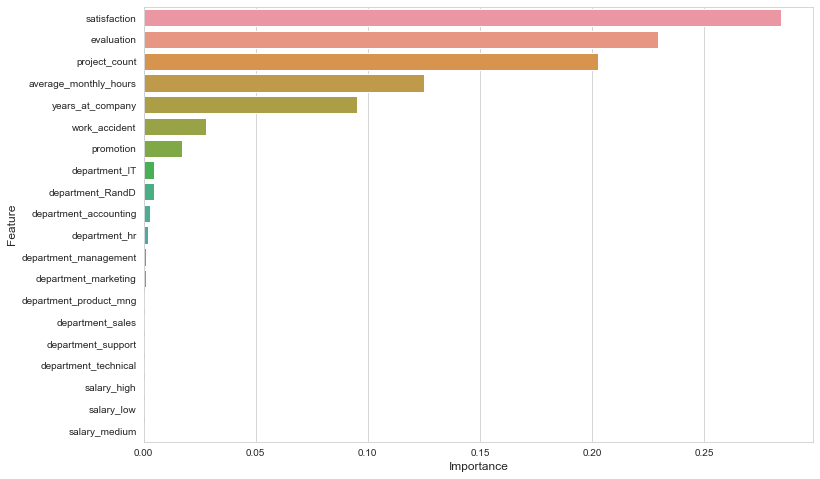

In [114]:
#Plotting feature importances
plt.figure(figsize = (12, 8))
sns.barplot(x = 'importance_value', y = x_train.columns, data = feature_importances_df)
plt.xlabel('Importance', fontsize = 12)
plt.ylabel('Feature', fontsize = 12)
plt.show()

**Observations:** Looking at the features of our model, the most relevant features that affect turnover are satisfaction, evaluation, the number of projects, monthly average hours, and years at the company.  This result mirrors our findings through our exploratory data anlaysis (EDA).

# Part 3 - Develop